<a href="https://colab.research.google.com/github/raquel-maia/python-dados/blob/main/Desafio_TITANIC_%26_Modelos_de_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Data Analytics: Desafio TITANIC & Modelos de Classificacao

O conjunto de dados do Titanic é muito popular, amplamente utilizado em Aprendizado de Máquina e competicoes da plataforma kaggle.

Ele contém informações detalhadas sobre todos os passageiros a bordo do navio.

O conjunto de dados do Titanic nos permite analisar os dados dos passageiros e prever o destino dos passageiros a bordo, ou seja, se eles sobreviverão ou não através de modelos de classificacao

## Carregando os pacotes

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

## Leitura dos dados

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Descriçao das colunas:

- PassengerId: Um identificador único para cada passageiro.

- Survived: Indica se o passageiro sobreviveu (1) ou não (0) ao desastre.

- Pclass: Classe do bilhete do passageiro (1ª, 2ª ou 3ª classe).

- Name: Nome do passageiro.

- Sex: Gênero do passageiro.

- Age: Idade do passageiro em anos.

- SibSp: Número de irmãos/cônjuges a bordo.

- Parch: Número de pais/filhos a bordo.

- Ticket: Número do bilhete do passageiro.

- Fare: Tarifa paga pelo passageiro.

- Cabin: Número da cabine do passageiro (quando disponível).

- Embarked: Porto de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton).

Utilizaremos como variável target no nosso modelo de classificacao a variável Survived.

Note que por se tratar de um desafio famoso no kaggle, a base de teste (test) nao inclui a coluna survived, justamente pelo objetivo ser a classificacao desta atraves de modelos de classificacao

## Analise inicial dos dados de treino

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
print("Numero de observacoes treino: ")
print(train.shape[0])
print("Numero de observacoes teste: ")
print(test.shape[0])

Numero de observacoes treino: 
891
Numero de observacoes teste: 
418


In [ ]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
datadict = pd.DataFrame(train.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = train.isnull().sum()
datadict['%_Valores_Nulos'] = (train.isnull().sum() / train.shape[0]) * 100
datadict['NUnique']=train.nunique()

In [ ]:
datadict

,Dtype,Valores_Nulos,%_Valores_Nulos,NUnique
PassengerId,int64,0,0.000000,891
Survived,int64,0,0.000000,2
Pclass,int64,0,0.000000,3
Name,object,0,0.000000,891
Sex,object,0,0.000000,2
Age,float64,177,19.865320,88
SibSp,int64,0,0.000000,7
Parch,int64,0,0.000000,7
Ticket,object,0,0.000000,681
Fare,float64,0,0.000000,248


### Analise inicial

- Verificamos que as variáveis sex e embarked estao como string,para o modelo interpretá-las teremos que a converter para numericas
- Verificamos variáveis com valores nulos, o que também deve ser tratado antes da modelagem
- O nome do passageiro poderiamos trabalhar com algum algoritmo mais sofisticado de processamento de linguagem natural. mas para evitar muita complexidade nao iremos utilizar nessa analise
- A variavel cabine tem 77% dos valoes nulos entao nao será correto substituit seus valores nulos pela média, já para idade e embarked faz sentido a substituicao

### Limpeza dos dados

#### Idade

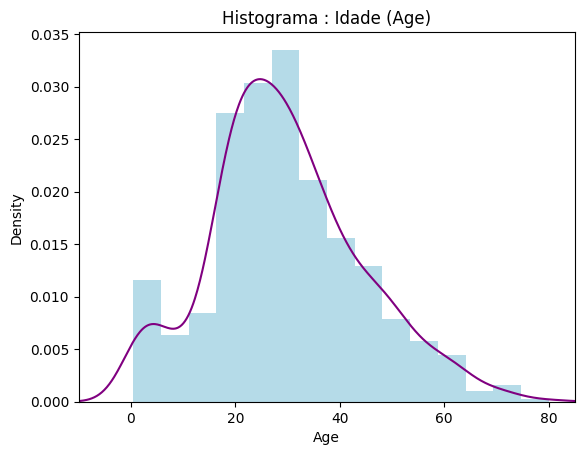

In [ ]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='lightblue', alpha=0.9)
train["Age"].plot(kind='density', color='purple')
ax.set(xlabel='Age')
ax.set_title("Histograma : Idade (Age)")
plt.xlim(-10,85)
plt.show()

In [ ]:
train['Age'].fillna(train['Age'].median(),inplace=True)

## Embarked: Porto de embarque

Passageiros embarcados por porto (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


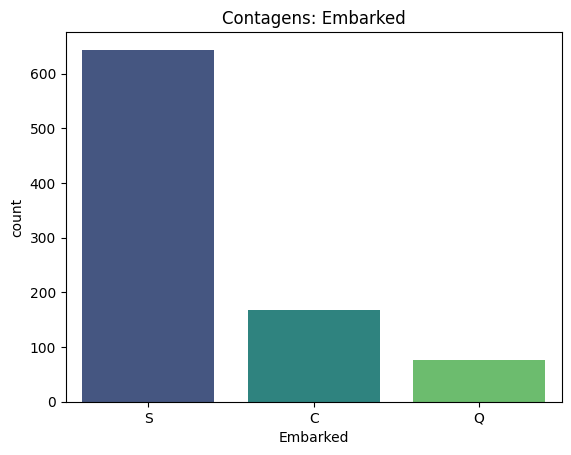

In [ ]:
print('Passageiros embarcados por porto (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train['Embarked'].value_counts())
ax = sns.countplot(x='Embarked', data=train, palette='viridis')
ax.set_title("Contagens: Embarked")
plt.show()

In [ ]:
print('Porto mais comum de embarque: %s.' %train['Embarked'].value_counts().idxmax())

Porto mais comum de embarque: S.


In [ ]:
train['Embarked'].fillna(train['Embarked'].mode(),inplace=True)

### Cabin

In [ ]:
### para a cabine como temos muitos valores nulos 77% vamos substituir por uma categoria "NA"
train['Cabin'].fillna("NA",inplace=True)

### Analise pre modelagem

#### Variaveis Numericas

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
### seleciona variaveis numericas
num_df = train.select_dtypes(include=['float64', 'int64'])
## calcula a matriz de correlação
corr = num_df.corr()

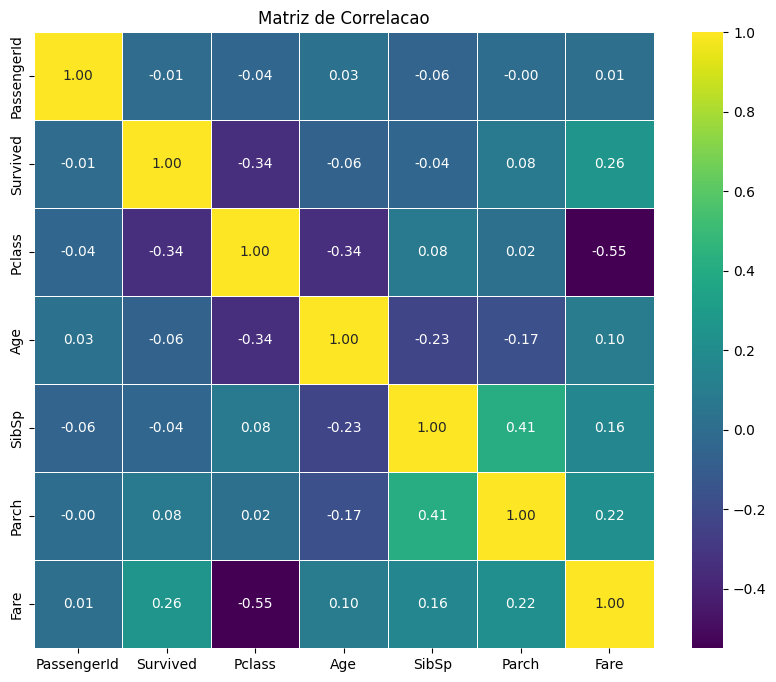

In [ ]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

Vemos uma correlacao entre Fare e Survived, e Parch & SibSp (Parentes e irmaos/irmas). indicando a classe como possivel variavel explicativa para a sobrevivencia dos individuos e que familias geralmente viagem com muitos entes.

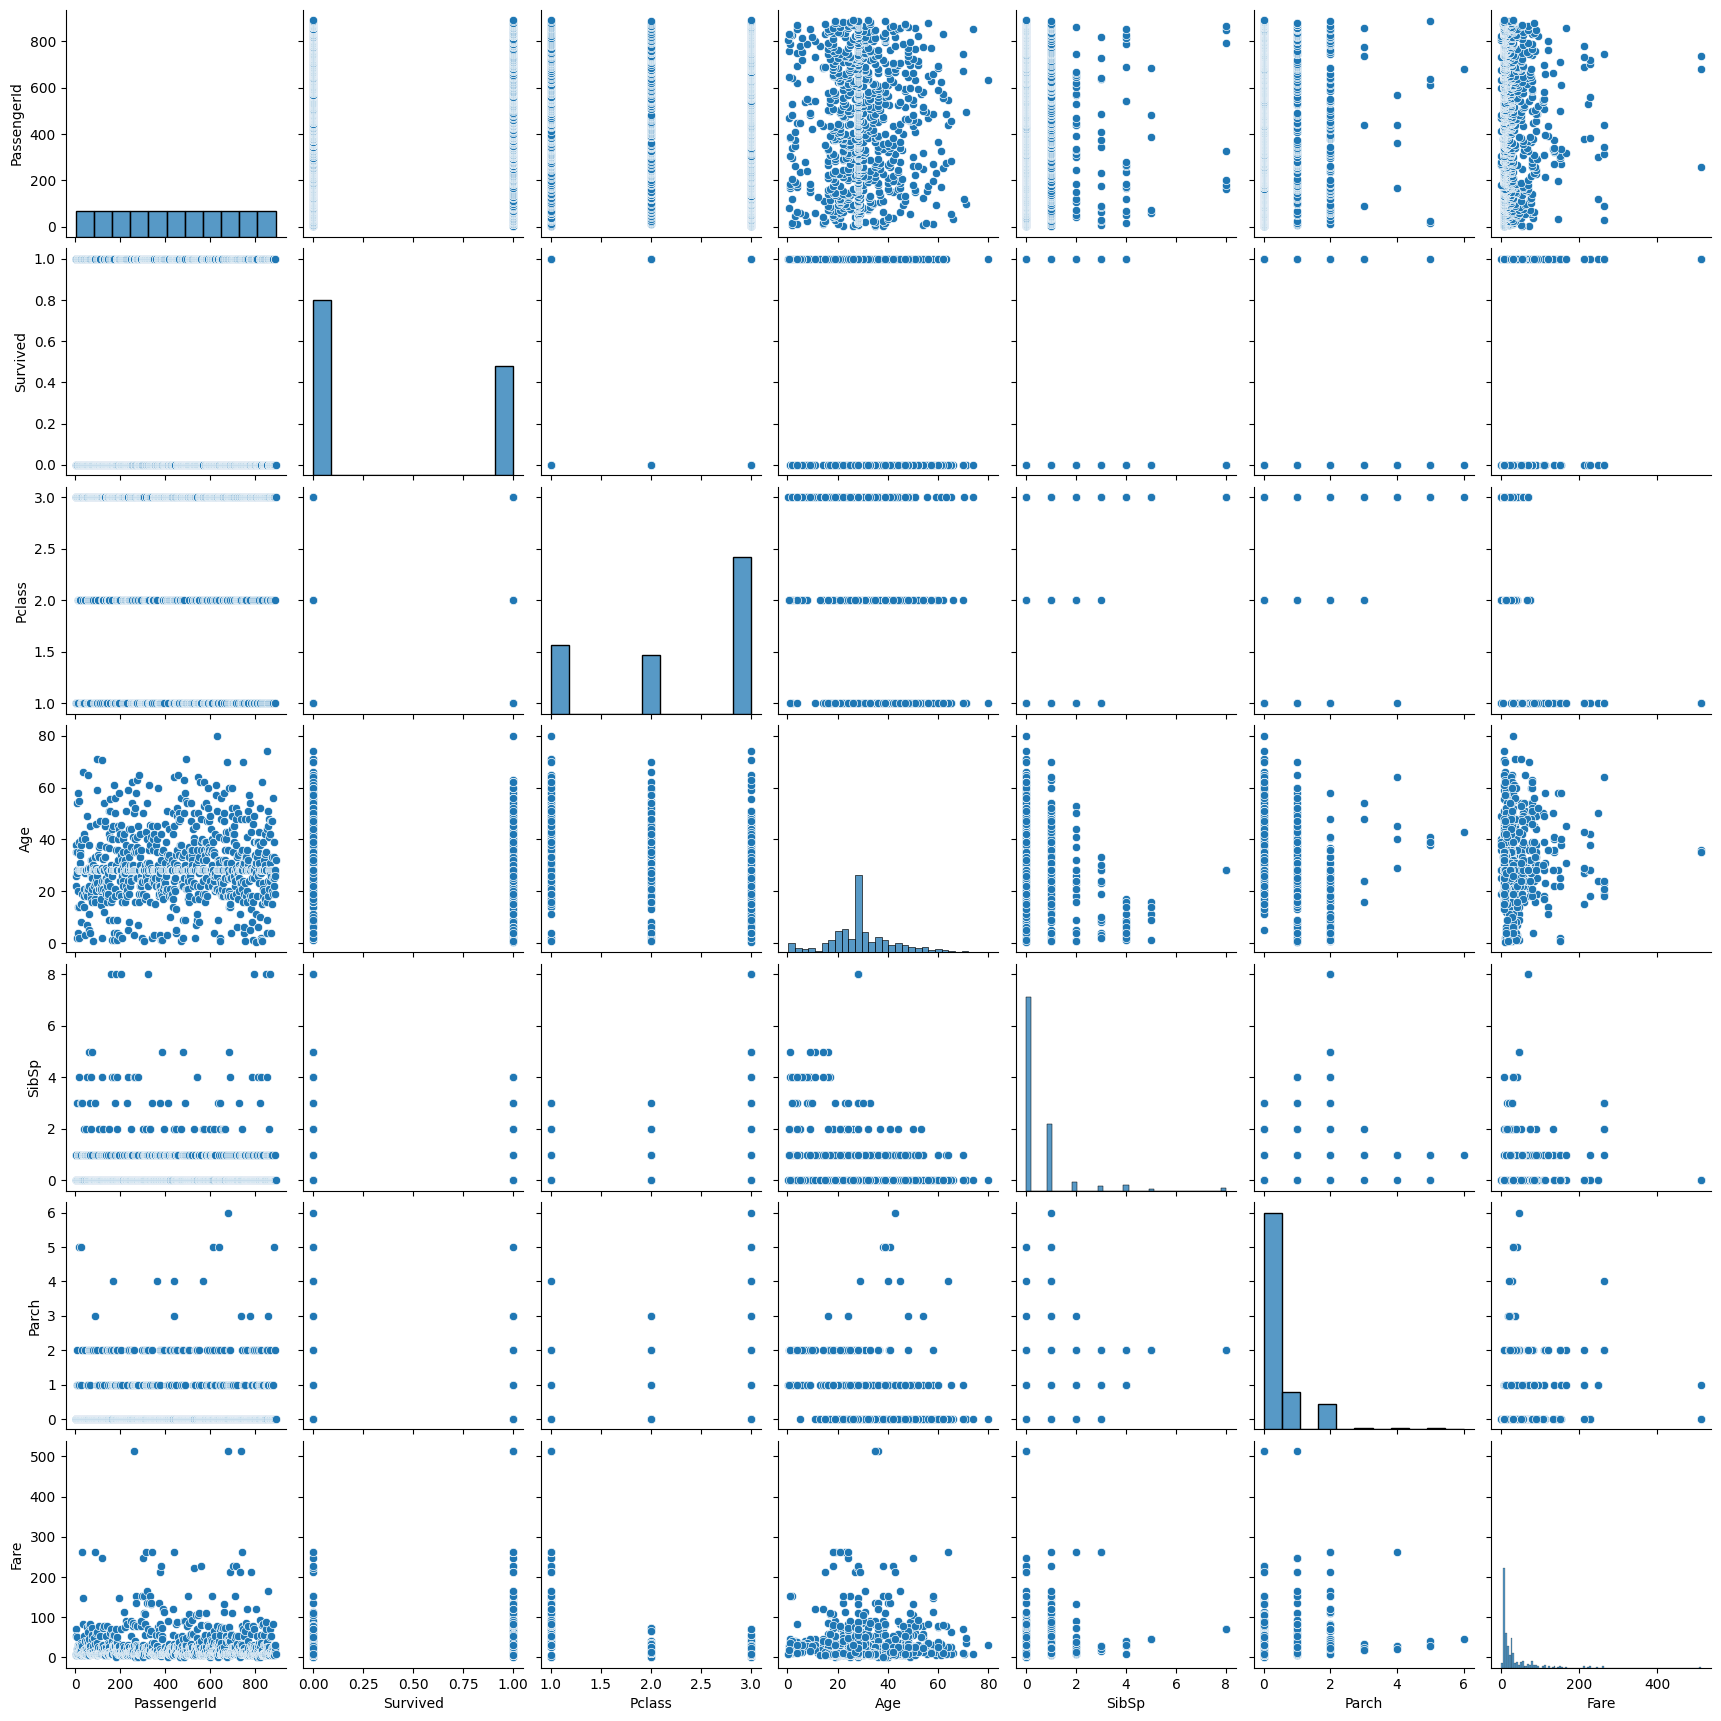

In [ ]:
sns.pairplot(num_df, diag_kind='hist')

#### Variaveis Categóricas

Text(0.5, 1.0, 'Contagem de Sobreviventes')

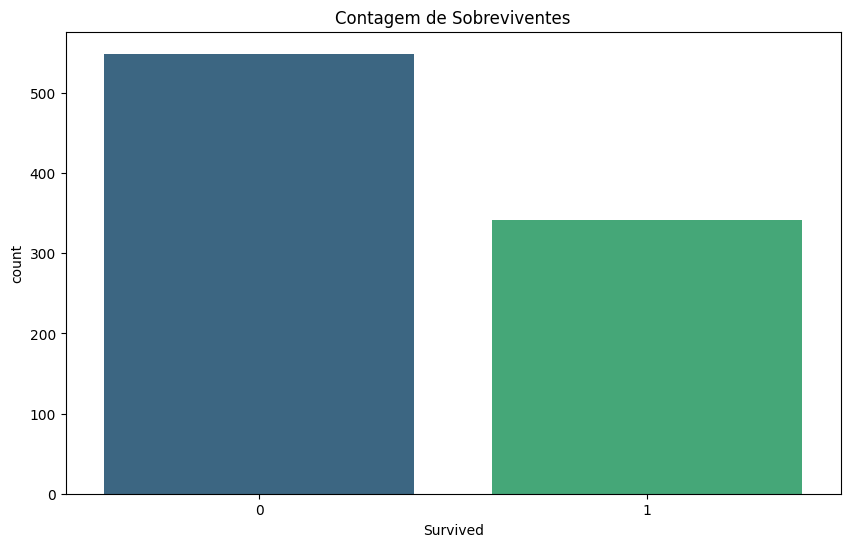

In [ ]:
palette = sns.color_palette("viridis", len(train['Survived'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(train, x="Survived",palette=palette).set_title('Contagem de Sobreviventes')

In [ ]:
train.Survived.value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Aqui vemos que o balanceamento nao parece ser um grande problema a quantidade de sobreviventes é proxima de 38% da base original , mas iremos aplicar posteriormente no exs2 a fim de avaliar melhorias em performance

Text(0.5, 1.0, 'Contagem de genero')

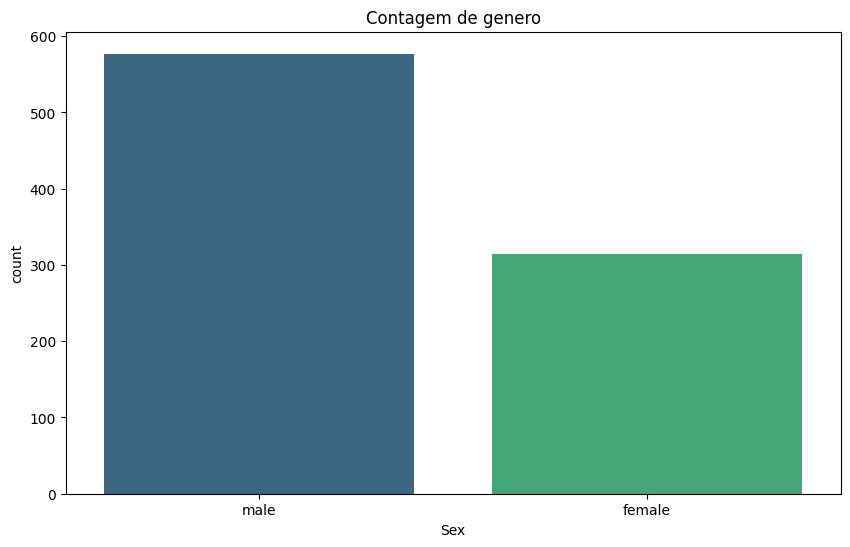

In [ ]:
palette = sns.color_palette("viridis", len(train['Sex'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(train, x="Sex",palette=palette).set_title('Contagem de genero')

In [ ]:
train.Sex.value_counts(normalize = True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Contagem de Portos embarcados')

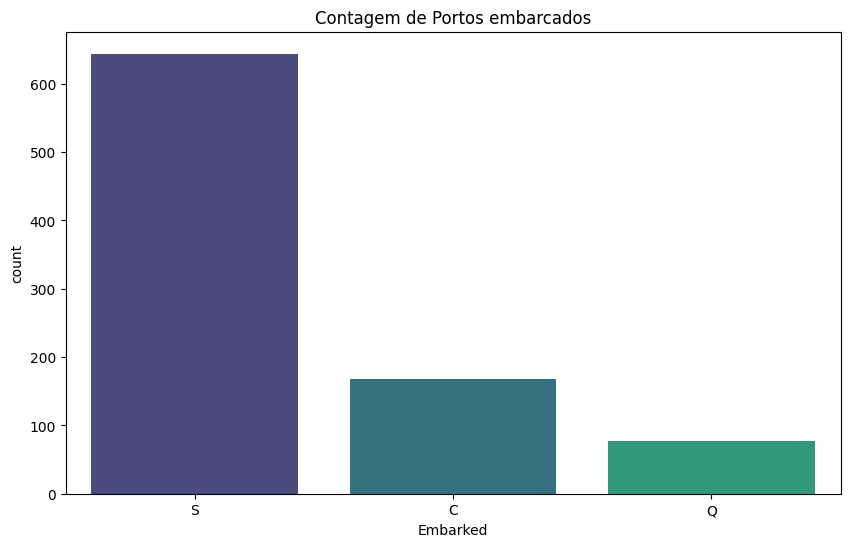

In [ ]:
palette = sns.color_palette("viridis", len(train['Embarked'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(train, x="Embarked",palette=palette).set_title('Contagem de Portos embarcados')

In [ ]:
train[['Survived', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Embarked']].groupby('Survived').agg({
                                  'Pclass':np.median,
                                  'Sex': pd.Series.mode,
                                  'Age': np.median,
                                  'SibSp': np.median,
                                  'Parch': np.median,
                                  'Fare': np.median,
                                  'Embarked': pd.Series.mode
                              })

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,3.0,male,28.0,0.0,0.0,10.5,S
1,2.0,female,28.0,0.0,0.0,26.0,S


Podemos ver que os passageiros sobreviventes estao mais relacionados a:
2nda classe, sexo feminino, e a um valor pago de ticket mais alto.
Variaveis que nao diferenciaram a classificacao de sobrevivente: Idade, Porto de embarque , numero de parentes



## Pre-processamento para modelagem:

- precisamos replicar as analises de valores nulos e substituicoes na base de teste
- precisamos excluir variaveis que nao serao utilizadas tanto na base de treino quanto teste
- transformar variaveis categoricas que serao utilizadas em numericas com o metodo get dummies

### Analise de valores nulos na base de teste

In [ ]:
datadict = pd.DataFrame(test.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = test.isnull().sum()
datadict['%_Valores_Nulos'] = (test.isnull().sum() / test.shape[0]) * 100
datadict['NUnique']=test.nunique()

In [ ]:
datadict

,Dtype,Valores_Nulos,%_Valores_Nulos,NUnique
PassengerId,int64,0,0.000000,418
Pclass,int64,0,0.000000,3
Name,object,0,0.000000,418
Sex,object,0,0.000000,2
Age,float64,86,20.574163,79
SibSp,int64,0,0.000000,7
Parch,int64,0,0.000000,8
Ticket,object,0,0.000000,363
Fare,float64,1,0.239234,169
Cabin,object,327,78.229665,76


In [ ]:
test['Age'].fillna(test['Age'].median(),inplace=True)
test['Cabin'].fillna('NA',inplace=True)

### vemos aqui fare como nulo, vamos substituir pela mediana
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S


## Filtragem das variáveis a serem utilizadas & Conversao das variáveis categóricas em numéricas

In [ ]:
### Filtragem da base
train_filtrado = train[[ 'Survived', 'Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Fare',  'Embarked']]
test_filtrado = test[[ 'Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Fare',  'Embarked']] #### limpeza excluindo survived por nao estrar nessa base conforme mencionado previamente

In [ ]:
#### criando as categoricas

train_features =pd.get_dummies(train_filtrado, columns=["Pclass","Embarked","Sex"],dtype=int)
train_features.drop('Sex_female', axis=1, inplace=True)

test_features =pd.get_dummies(test_filtrado, columns=["Pclass","Embarked","Sex"],dtype=int)
test_features.drop('Sex_female', axis=1, inplace=True)

### criando a variável viajou sozinho
train_features['viajou_sozinho']=np.where((train_features["SibSp"]+train_features["Parch"])>0, 0, 1)
train_features.drop(["Parch","SibSp"], axis =1, inplace = True)

test_features['viajou_sozinho']=np.where((test_features["SibSp"]+test_features["Parch"])>0, 0, 1)
test_features.drop(["Parch","SibSp"], axis =1, inplace = True)

In [ ]:
train_features.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,viajou_sozinho
0,0,22.0,7.2500,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,0,0,1,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,0,0,1,0,0,1,1,1


Text(0.5, 1.0, 'Contagem: viajou sozinho')

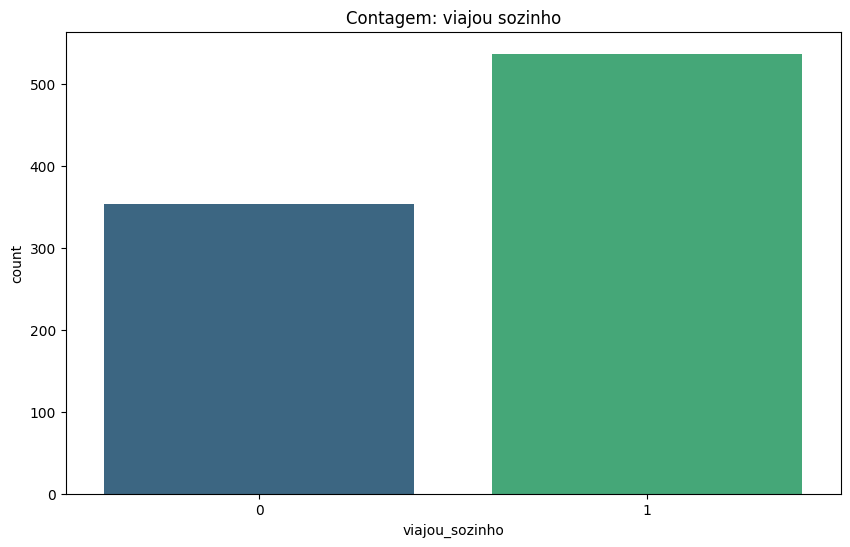

In [ ]:
palette = sns.color_palette("viridis", len(train_features['viajou_sozinho'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(train_features, x="viajou_sozinho",palette=palette).set_title('Contagem: viajou sozinho')

## Regressao Logistica

In [ ]:
#### leitura dos pacotes

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [ ]:
#### Cria vetores X e y com base nos dados treino e teste
###### x contem as variaveis explicativas
X = train_features[['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'viajou_sozinho']]

###### y contem a variavel de interesse
y = train_features[[ 'Survived']]

NameError: name 'train_features' is not defined

In [ ]:
###### vamos usar train_test split do pacote sklearn para a separacao dos dados deixando 80% treino 20% teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit do modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#### vamos agora aplicar o modelo fitado na base de test

y_pred = logreg.predict(X_test) ### aplicacao do modelo
y_pred_proba = logreg.predict_proba(X_test)[:, 1] ### previsao da probabilidade

In [ ]:
##### mostrnado o output
X_test["Previsao_Modelo"] = y_pred
X_test["Probabilidade_Sobreviver"] = y_pred_proba

In [ ]:
X_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,viajou_sozinho,Previsao_Modelo,Probabilidade_Sobreviver
709,28.0,15.2458,0,0,1,1,0,0,1,0,0,0.125253
439,31.0,10.5000,0,1,0,0,0,1,1,1,0,0.254106
840,20.0,7.9250,0,0,1,0,0,1,1,1,0,0.104485
720,6.0,33.0000,0,1,0,0,0,1,0,0,1,0.879431
39,14.0,11.2417,0,0,1,1,0,0,0,0,1,0.716804
...,...,...,...,...,...,...,...,...,...,...,...,...
433,17.0,7.1250,0,0,1,0,0,1,1,1,0,0.111787
773,28.0,7.2250,0,0,1,1,0,0,1,1,0,0.138893
25,38.0,31.3875,0,0,1,0,0,1,0,0,0,0.453582
84,17.0,10.5000,0,1,0,0,0,1,0,1,1,0.858343


### Performance do Modelo

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

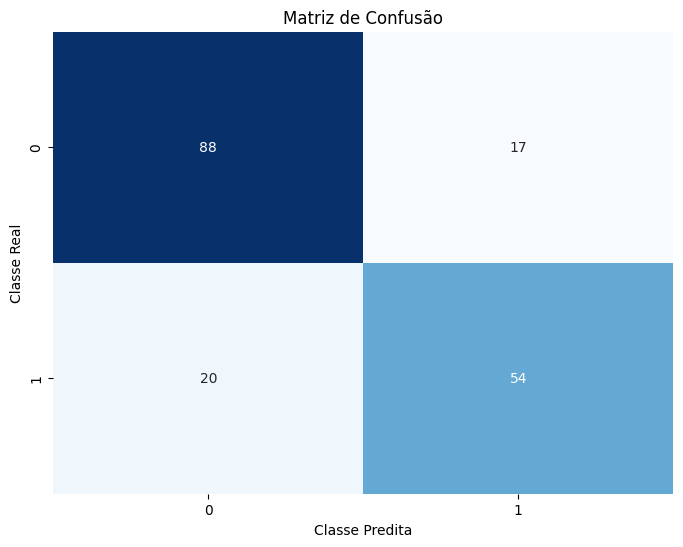

Acurácia: 0.7932960893854749
Precisão: 0.7605633802816901
Recall: 0.7297297297297297


In [ ]:
# Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

## Obtendo as variáveis mais relevantes do modelo

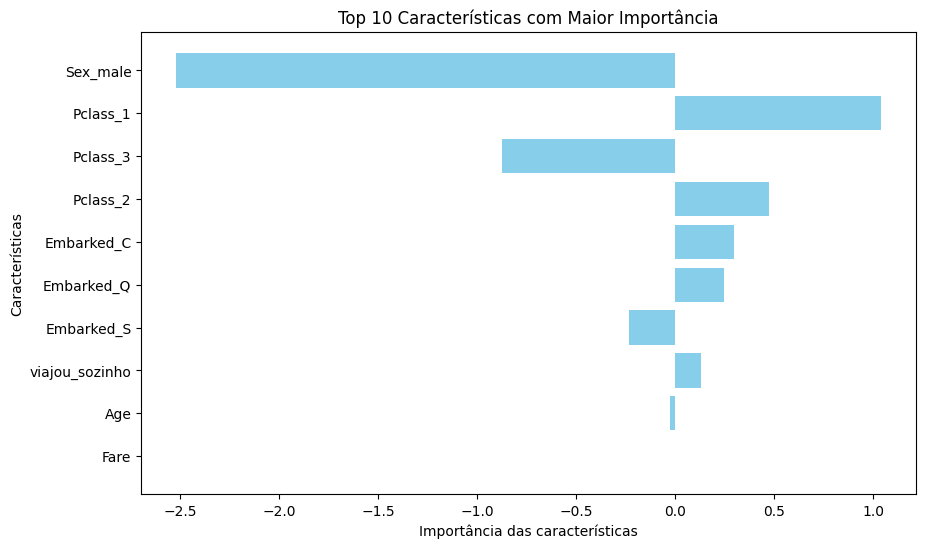

In [ ]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients = logreg.coef_[0]
feature_names = X.columns

# Ordenando os índices das características pelos coeficientes
indices = np.argsort(np.abs(coefficients))

# Top 10 características com maior importância
top_features = feature_names[indices][-10:]
top_importances = coefficients[indices][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Top 10 Características com Maior Importância')
plt.show()

### Coeficientes

In [ ]:
# Criando um DataFrame para a tabela de regressão
regression_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenando as features pelos coeficientes em ordem decrescente
regression_table = regression_table.reindex(regression_table['Coefficient'].abs().sort_values(ascending=False).index)

# Exibindo a tabela
print(regression_table)

          Feature  Coefficient
8        Sex_male    -2.519240
2        Pclass_1     1.039249
4        Pclass_3    -0.875679
3        Pclass_2     0.474093
5      Embarked_C     0.295926
6      Embarked_Q     0.248634
7      Embarked_S    -0.234246
9  viajou_sozinho     0.131448
0             Age    -0.025656
1            Fare     0.001542


### Aplicando nos dados de teste para prever

In [ ]:
#### vamos agora aplicar o modelo fitado na base de test

previsao = logreg.predict(test_features) ### aplicacao do modelo
probabilidade = logreg.predict_proba(test_features)[:, 1] ### previsao da probabilidade

In [ ]:
test_features["Previsao_Modelo"] = previsao
test_features["Probabilidade_Sobreviver"] = probabilidade

In [ ]:
test_features

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,viajou_sozinho,Previsao_Modelo,Probabilidade_Sobreviver
0,34.5,7.8292,0,0,1,0,1,0,1,1,0,0.115307
1,47.0,7.0000,0,0,1,0,0,1,0,0,0,0.388242
2,62.0,9.6875,0,1,0,0,1,0,1,1,0,0.199320
3,27.0,8.6625,0,0,1,0,0,1,1,1,0,0.088927
4,22.0,12.2875,0,0,1,0,0,1,0,0,1,0.548559
...,...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,0,0,1,0,0,1,1,1,0,0.088850
414,39.0,108.9000,1,0,0,1,0,0,0,1,1,0.923025
415,38.5,7.2500,0,0,1,0,0,1,1,1,0,0.067607
416,27.0,8.0500,0,0,1,0,0,1,1,1,0,0.088850


Text(0.5, 1.0, 'Contagem: Previsao Modelo')

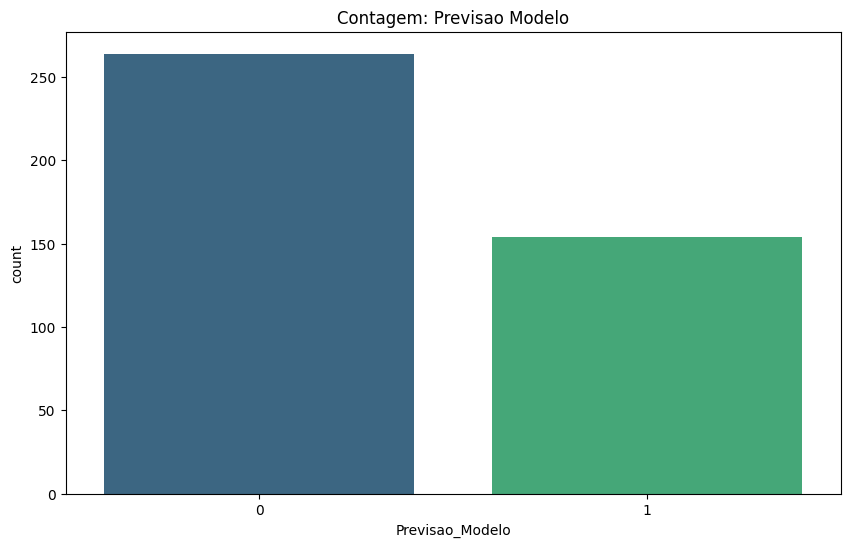

In [ ]:
palette = sns.color_palette("viridis", len(test_features['Previsao_Modelo'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(test_features, x="Previsao_Modelo",palette=palette).set_title('Contagem: Previsao Modelo')

# Exemplo 2: Titanic com Balanceamento

Text(0.5, 1.0, 'Contagem de Sobreviventes')

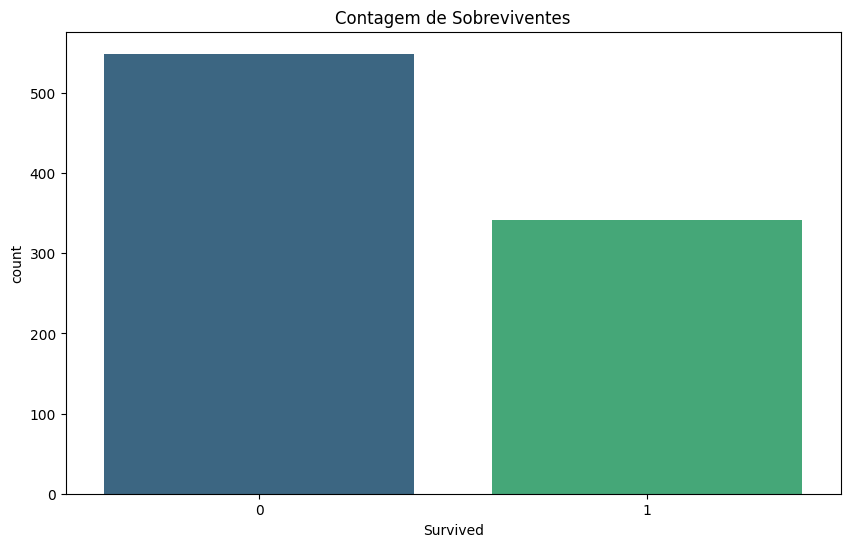

In [ ]:
palette = sns.color_palette("viridis", len(train_features['Survived'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(train_features, x="Survived",palette=palette).set_title('Contagem de Sobreviventes')

## Undersampling

In [ ]:
train_features.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
contagem_minoritaria = train_features[train_features.Survived ==1 ].shape[0]
contagem_maioritaria = train_features[train_features.Survived ==0 ].shape[0]
print("Contagem da classe minoritária (Survived=1):", contagem_minoritaria)
print("Contagem da classe majoritária (Survived=0):", contagem_maioritaria)

Contagem da classe minoritária (Survived=1): 342
Contagem da classe majoritária (Survived=0): 549


no undersampling vamos transformar a base de treino para obter a mesma proporcao da classe minotiraria e maioritaria, retirando aleatoriamente elementos da classe maioritaria

In [ ]:
# Calculando o número de amostras a serem subamostradas
undersample_size = contagem_minoritaria

# Realizando o undersampling
minority_train = train_features[train_features.Survived == 1].copy()
majority_train = train_features[train_features.Survived == 0].copy()

### seleciona aleatoriamente as observacoes da classe majoritaria
undersampled_majority = majority_train.sample(n=undersample_size, replace=False, random_state=42)

# Combinando as amostras da classe minoritária e subamostrada da classe majoritária
undersampled_train_features = pd.concat([undersampled_majority, minority_train], axis=0)
undersampled_train_labels = pd.concat([pd.Series([0]*undersample_size), pd.Series([1]*contagem_minoritaria)], axis=0)

# Verificando o novo balanceamento
print("Contagem de amostras após o undersampling:")
undersampled_train_labels.value_counts()

Contagem de amostras após o undersampling:


0    342
1    342
Name: count, dtype: int64

In [ ]:
undersampled_train_features

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,viajou_sozinho
312,0,26.0,26.0000,0,1,0,0,0,1,0,0
124,0,54.0,77.2875,1,0,0,0,0,1,1,0
783,0,28.0,23.4500,0,0,1,0,0,1,1,0
167,0,45.0,27.9000,0,0,1,0,0,1,0,0
772,0,57.0,10.5000,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
875,1,15.0,7.2250,0,0,1,1,0,0,0,1
879,1,56.0,83.1583,1,0,0,1,0,0,0,0
880,1,25.0,26.0000,0,1,0,0,0,1,0,0
887,1,19.0,30.0000,1,0,0,0,0,1,0,1


## Modelo undersampled

In [ ]:
#### Cria vetores X e y com base nos dados
###### x contem as variaveis explicativas
X = undersampled_train_features[['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'viajou_sozinho']]

###### y contem a variavel de interesse
y = undersampled_train_features[[ 'Survived']]

###### vamos usar train_test split do pacote sklearn para a separacao dos dados deixando 80% treino 20% teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# fit do modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

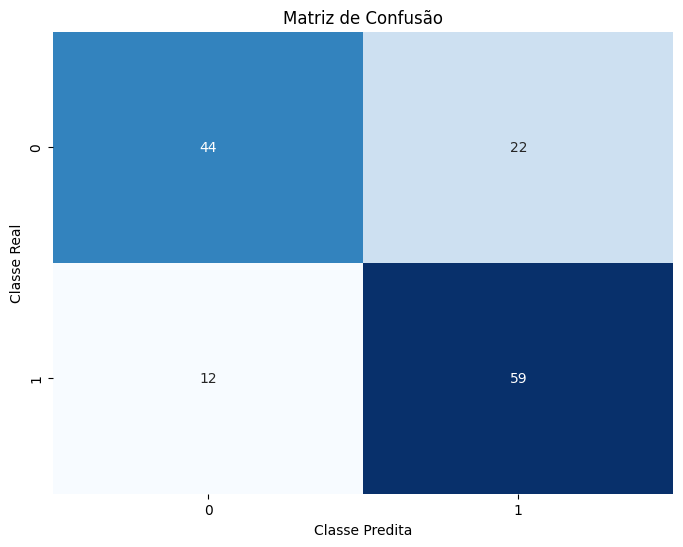

Acurácia: 0.7518248175182481
Precisão: 0.7283950617283951
Recall: 0.8309859154929577


In [ ]:
#### vamos agora aplicar o modelo fitado na base de test

y_pred = logreg.predict(X_test) ### aplicacao do modelo
y_pred_proba = logreg.predict_proba(X_test)[:, 1] ### previsao da probabilidade

# Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Acuracia piorou porém o recall melhorou , ou seja dado que a pessoa sobreviveu, conseguimos acertar melhor com o modelo que ela realente sobreviveu

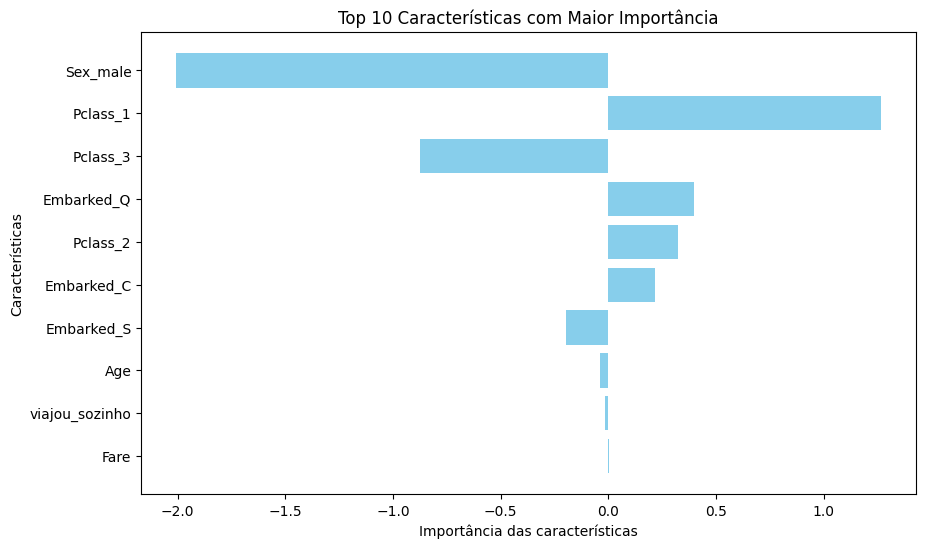

In [ ]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients = logreg.coef_[0]
feature_names = X.columns

# Ordenando os índices das características pelos coeficientes
indices = np.argsort(np.abs(coefficients))

# Top 10 características com maior importância
top_features = feature_names[indices][-10:]
top_importances = coefficients[indices][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Top 10 Características com Maior Importância')
plt.show()

## Modelo com oversampling

In [ ]:
from sklearn.utils import resample

# Calculando o número de amostras a serem subamostradas
oversample_size = contagem_maioritaria

# Realizando o oversampling
minority_train = train_features[train_features.Survived == 1].copy()
majority_train = train_features[train_features.Survived == 0].copy()

oversampled_minority = resample(minority_train, replace=True, n_samples=oversample_size, random_state=42)

# Combinando as amostras da classe majoritária e da classe minoritária sobreamostrada
oversampled_train_features = pd.concat([majority_train, oversampled_minority], axis=0)
oversampled_train_labels = pd.concat([pd.Series([0]*contagem_maioritaria), pd.Series([1]*oversample_size)], axis=0)


# Verificando o novo balanceamento
print("Contagem de amostras após o oversampling:")
oversampled_train_labels.value_counts()

Contagem de amostras após o oversampling:


0    549
1    549
Name: count, dtype: int64

In [ ]:
#### Cria vetores X e y com base nos dados
###### x contem as variaveis explicativas
X = oversampled_train_features[['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'viajou_sozinho']]

###### y contem a variavel de interesse
y = oversampled_train_features[[ 'Survived']]

###### vamos usar train_test split do pacote sklearn para a separacao dos dados deixando 80% treino 20% teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# fit do modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

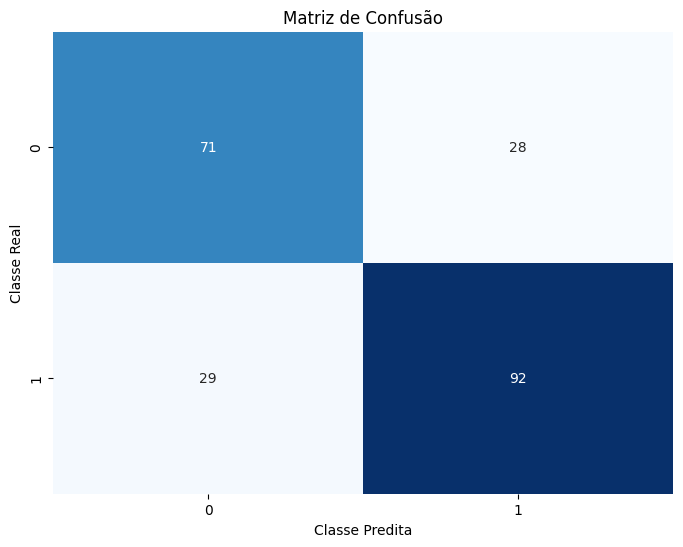

Acurácia: 0.740909090909091
Precisão: 0.7666666666666667
Recall: 0.7603305785123967


In [ ]:
#### vamos agora aplicar o modelo fitado na base de test

y_pred = logreg.predict(X_test) ### aplicacao do modelo
y_pred_proba = logreg.predict_proba(X_test)[:, 1] ### previsao da probabilidade

# Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

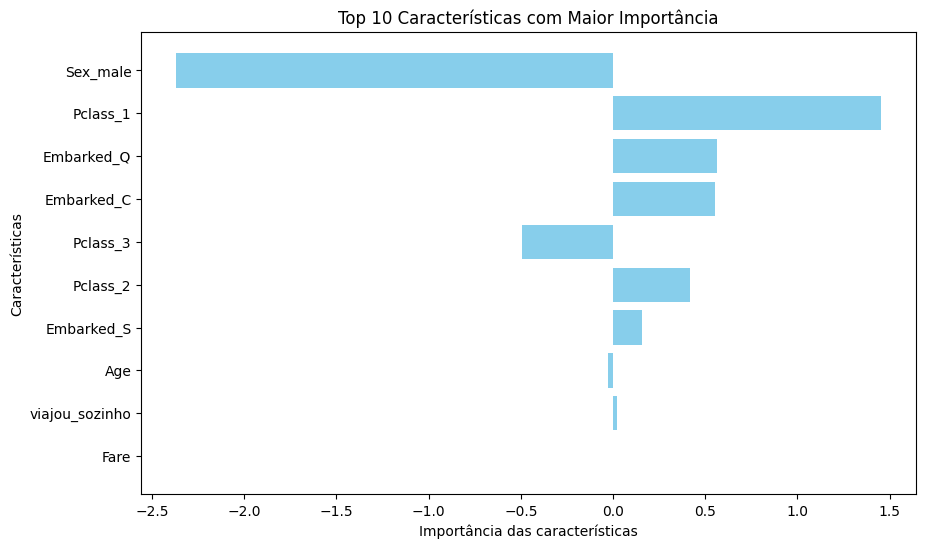

In [ ]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients = logreg.coef_[0]
feature_names = X.columns

# Ordenando os índices das características pelos coeficientes
indices = np.argsort(np.abs(coefficients))

# Top 10 características com maior importância
top_features = feature_names[indices][-10:]
top_importances = coefficients[indices][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Top 10 Características com Maior Importância')
plt.show()

## Nesse caso obtivemos piora de performance do modelo, sendo preferivel utilizar os modelos ou: sem balanceamento ou com undersampling